<a href="https://colab.research.google.com/github/rahulmalu1998/ECG-preciction/blob/main/AR_MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/111.csv')
df.head()

,'sample #','MLII','V1'
0,0,1017,1031
1,1,1017,1031
2,2,1017,1031
3,3,1017,1031
4,4,1017,1031


In [ ]:
df=df.drop(labels='\'sample #\'',axis=1)
df=df.drop(labels='\'V1\'',axis=1)
len(df)

650000

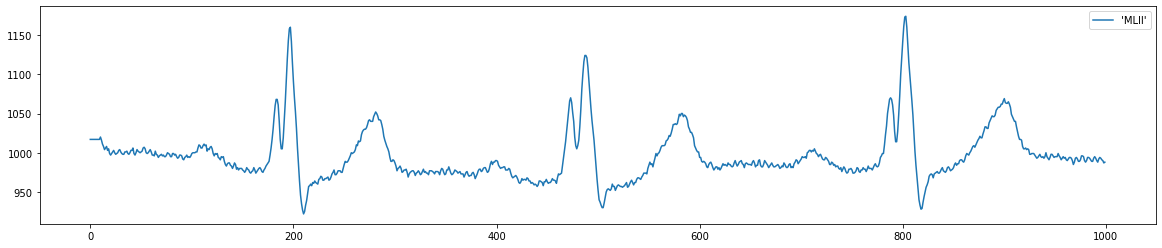

In [ ]:
df=df.iloc[0:1000,:]
df.plot(y='\'MLII\'',figsize=(20,4))

In [ ]:
import datetime
temp=pd.period_range(start='2020-10-08', periods=1000, freq='2777U')
df.index= temp.to_timestamp()
y=df
y.head()

,'MLII'
2020-10-08 00:00:00.000000,1017
2020-10-08 00:00:00.002777,1017
2020-10-08 00:00:00.005554,1017
2020-10-08 00:00:00.008331,1017
2020-10-08 00:00:00.011108,1017


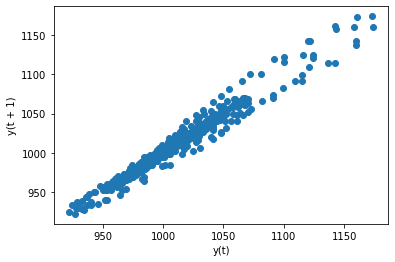

In [ ]:
from matplotlib import pyplot
from pandas.plotting import lag_plot

lag_plot(y)
pyplot.show()

High correlation indication

In [ ]:
values = pd.DataFrame(y.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
dataframe.head()
# dataframe.plot(y'\'MLII\'')


,t-1,t+1
0,NaN,1017
1,1017.0,1017
2,1017.0,1017
3,1017.0,1017
4,1017.0,1017


In [ ]:
# split into train and test sets
X = dataframe.values
X


array([[  nan, 1017.],
       [1017., 1017.],
       [1017., 1017.],
       ...,
       [ 991.,  990.],
       [ 990.,  987.],
       [ 987.,  988.]])

In [ ]:

train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# # persistence model
# def model_persistence(x):
# 	return x
 
# # walk-forward validation
# predictions = list()
# for x in test_X:
# 	yhat = model_persistence(x)
# 	predictions.append(yhat)
# # test_score = mean_absolute_percentage_error(test_y, predictions)
# # print('Test MSE: %.3f' % test_score)
# # plot predictions vs expected
# pyplot.figure(figsize=(20,5))
# pyplot.plot(predictions)
# pyplot.plot(test_y)
# pyplot.show()

In [ ]:
from sklearn.metrics import mean_squared_error
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %f' % test_score)

Test MSE: 35.185294


NameError: ignored

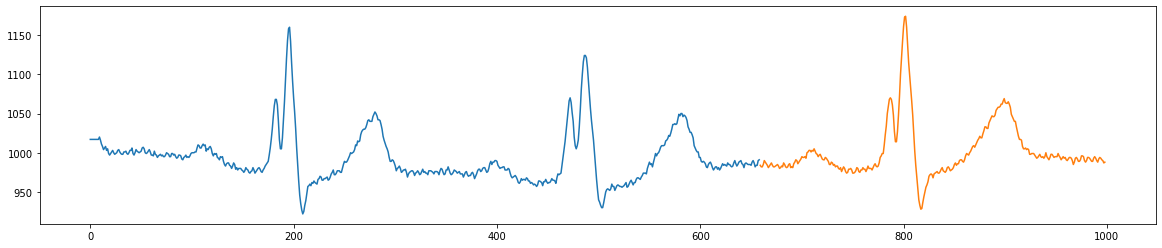

In [ ]:
# pyplot.figure(figsize=(20,4))
# pyplot.plot(train_y)
# pyplot.plot([None for i in train_y] + [x for x in test_y])
# pyplot.plot([None for i in train_y] + [x for x in predictions])
# pyplot.show()
# print(len(predictions))
# # print(test_y.shape)

This was a baseline model for prediction

In [ ]:
# testPredict=predictions
# testY=test_y
# forecast_errors = [testY[:,0][i]-testPredict[:,0][i] for i in range(len(testPredict[:,0]))]
# # calculate root mean squared error
# # trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# # print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))

# bias = sum(forecast_errors) * 1.0/len(testPredict[:,0])
# print('Bias: %f' % bias)
# mae = mean_absolute_error(testY[:,0], testPredict[:,0])
# print('MAE: %f' % mae)
# print('Test Score(RMSE): %.2f' % (testScore))
# mse = mean_squared_error(testY[:,0], testPredict[:,0])
# print('MSE: %f' % mse)
# mape=sMAPE(testY[:,0], testPredict[:,0])
# print('MAPE: %f' %mape)


KeyError: ignored

In [ ]:
pip install statsmodels --upgrade


     |████████████████████████████████| 9.5MB 4.7MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


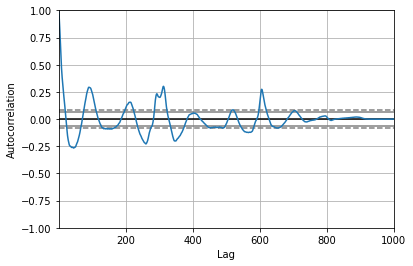

In [ ]:
pd.plotting.autocorrelation_plot(y['\'MLII\''])

In [ ]:
from statsmodels.tsa.ar_model import AR
X = y['\'MLII\''].dropna()
#create train/test datasets

train_data = X[1:len(X)-500]
test_data = X[len(X)-500:]
print(train_data)
print(test_data)
#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

2020-10-08 00:00:00.002777    1017
2020-10-08 00:00:00.005554    1017
2020-10-08 00:00:00.008331    1017
2020-10-08 00:00:00.011108    1017
2020-10-08 00:00:00.013885    1017
                              ... 
2020-10-08 00:00:01.374615    1029
2020-10-08 00:00:01.377392    1016
2020-10-08 00:00:01.380169     999
2020-10-08 00:00:01.382946     983
2020-10-08 00:00:01.385723     966
Freq: 2777U, Name: 'MLII', Length: 499, dtype: int64
2020-10-08 00:00:01.388500    952
2020-10-08 00:00:01.391277    940
2020-10-08 00:00:01.394054    937
2020-10-08 00:00:01.396831    933
2020-10-08 00:00:01.399608    930
                             ... 
2020-10-08 00:00:02.763115    993
2020-10-08 00:00:02.765892    991
2020-10-08 00:00:02.768669    990
2020-10-08 00:00:02.771446    987
2020-10-08 00:00:02.774223    988
Freq: 2777U, Name: 'MLII', Length: 500, dtype: int64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [ ]:
print('The lag value chose is: %s' % model_fitted.k_ar)
print('The coefficients of the model are:\n %s' % model_fitted.params)

The lag value chose is: 18
The coefficients of the model are:
 const         31.681279
L1.'MLII'      1.696443
L2.'MLII'     -0.414282
L3.'MLII'     -0.421360
L4.'MLII'      0.004345
L5.'MLII'      0.044118
L6.'MLII'      0.206774
L7.'MLII'     -0.269602
L8.'MLII'      0.058714
L9.'MLII'     -0.016753
L10.'MLII'     0.207538
L11.'MLII'     0.096777
L12.'MLII'    -0.216009
L13.'MLII'     0.008895
L14.'MLII'    -0.210017
L15.'MLII'     0.085323
L16.'MLII'     0.212448
L17.'MLII'     0.061358
L18.'MLII'    -0.166635
dtype: float64


(500,)


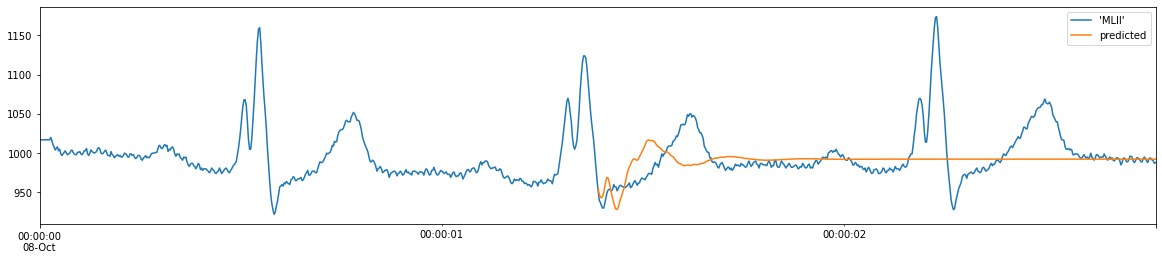

In [ ]:
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(X)-2, 
    dynamic=False)

# create a comparison dataframe
compare_df = pd.concat(
    [y['\'MLII\''].tail(1000),
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})

#plot the two values
print(predictions.shape)
compare_df.plot(figsize=(20,4))

In [ ]:

print(len(test_data))
print(len(predictions))


500
500


In [ ]:
import math
import numpy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
def sMAPE(a, b):
    """
    Calculates sMAPE
    :param a: actual values
    :param b: predicted values
    :return: sMAPE
    """
    # a = numpy.reshape(a, (-1,))
    # b = numpy.reshape(b, (-1,))
    return numpy.mean(100*2.0 * numpy.abs(a - b) / (numpy.abs(a) + numpy.abs(b)))

In [ ]:
forecast_errors = [test_data[i]-predictions[i] for i in range(len(predictions))]
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_data, predictions))
print('Errors for AR model')
bias = sum(forecast_errors) * 1.0/len(predictions)
print('Bias: %f' % bias)
mae = mean_absolute_error(test_data, predictions)
print('MAE: %f' % mae)
print('Test Score(RMSE): %.2f' % (testScore))
mse = mean_squared_error(test_data, predictions)
print('MSE: %f' % mse)
mape=sMAPE(test_data, predictions)
print('MAPE: %f' %mape)

Errors for AR model
Bias: 6.495055
MAE: 21.110642
Test Score(RMSE): 33.86
MSE: 1146.799528
MAPE: 2.092017


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y['\'MLII\''].tail(500), predictions)
r2

-0.0013758213696037913

questions to ask: Should i smooth the data wouldnt it contribute to data loss
autoregression baseline model is itself showing great results, 
how to integrate both ar and ma models manually?

In [ ]:
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

Test MSE: 115.181


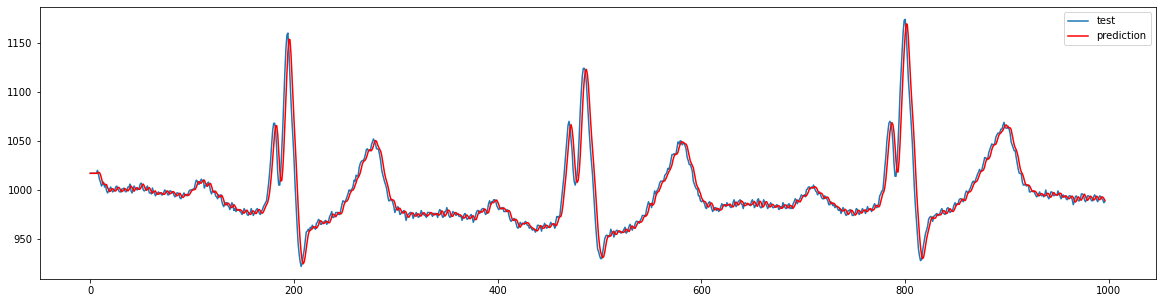

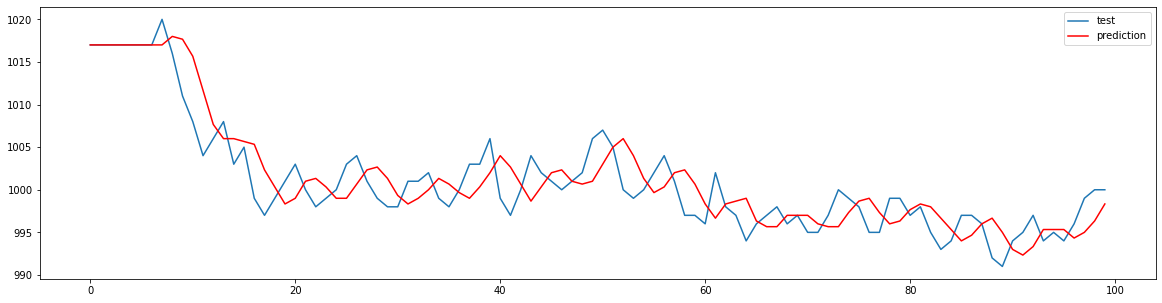

In [ ]:
series = df
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.figure(figsize=(20,5))
pyplot.plot(test,label='test')
pyplot.plot(predictions, color='red',label='prediction')
pyplot.legend()
pyplot.show()
# zoom plot
pyplot.figure(figsize=(20,5))
pyplot.plot(test[0:100],label='test')
pyplot.plot(predictions[0:100], color='red',label='prediction')
pyplot.legend()
pyplot.show()

In [ ]:
forecast_errors = [test[i]-predictions[i] for i in range(len(predictions))]
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test, predictions))
print('Errors for MA model')
bias = sum(forecast_errors) * 1.0/len(predictions)
print('Bias: %f' % bias)
mae = mean_absolute_error(test, predictions)
print('MAE: %f' % mae)
print('Test Score(RMSE): %.2f' % (testScore))
mse = mean_squared_error(test, predictions)
print('MSE: %f' % mse)
test=numpy.array(test)
predictions=numpy.array(predictions)
mape=sMAPE(test, predictions)
print('MAPE: %f' %mape)

Errors for MA model
Bias: -0.058175
MAE: 5.927783
Test Score(RMSE): 10.73
MSE: 115.180653
MAPE: 3.282334
